<h1>API Homework: global weather <h1/>

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from config import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# x = list(lat_lngs)
# print(x)

In [4]:
# lats

In [3]:
# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

lat = []
temp = []
hum = []
wind = []
cloud = []

for city in cities:
    query_url = f"{url}appid={api_key}&q={city}&units={units}"
    weather_request = requests.get(query_url)
    weather_json = weather_request.json()
    lat.append(weather_json["coord"]['lat'])
    temp.append(weather_json['main']['temp'])
    hum.append(weather_json['main']['humidity'])
    wind.append(weather_json['wind']['speed'])
    cloud.append(weather_json['clouds']['all'])

KeyError: 'coord'

In [4]:
print(str(cities)) 

['yar-sale', 'marsa matruh', 'zeya', 'adrar', 'waingapu', 'mar del plata', 'jamestown', 'hermanus', 'cumana', 'sentyabrskiy', 'amderma', 'tumannyy', 'punta arenas', 'dakar', 'new norfolk', 'constitucion', 'ushuaia', 'quatre cocos', 'ibra', 'rikitea', 'awjilah', 'ancud', 'port hardy', 'gat', 'tapes', 'cape town', 'kieta', 'hualmay', 'riyadh', 'kegayli', 'colesberg', 'houthulst', 'oranjemund', 'goderich', 'port macquarie', 'atuona', 'manati', 'ust-kuyga', 'lompoc', 'yerbogachen', 'gurgan', 'georgetown', 'bulawayo', 'aklavik', 'busselton', 'port alfred', 'komsomolskiy', 'upernavik', 'fort nelson', 'antofagasta', 'mutoko', 'shingu', 'tahoua', 'ayr', 'bethel', 'laguna', 'kahului', 'zvishavane', 'dingle', 'biga', 'balsas', 'tunxi', 'khatanga', 'kismayo', 'ilulissat', 'kapaa', 'vaini', 'saskylakh', 'puerto ayora', 'iqaluit', 'bontang', 'qaanaaq', 'grand river south east', 'dunedin', 'mataura', 'santa maria', 'vagay', 'ambovombe', 'comodoro rivadavia', 'salalah', 'coracora', 'jirlau', 'hovd', 

In [6]:
len(cities)

615

In [8]:
for city in cities:
    query_url = f"{url}appid={api_key}&q={city}&units={units}"
    weather_request = requests.get(query_url)
    weather_json = weather_request.json()
    lat.append(weather_json["coord"]['lat'])
    temp.append(weather_json['main']['temp'])
    hum.append(weather_json['main']['humidity'])
    wind.append(weather_json['wind']['speed'])
    cloud.append(weather_json['clouds']['all'])

KeyError: 'coord'

In [11]:
weather_json['coord']['lon']

-0.6

In [5]:
len(lat)

9

In [47]:
hum

[]

In [13]:
weather_dict = {
    "City": cities,
    "Latitude": lat,
    "Temp degF": temp,
    "%Humidity": hum,
    "Wind Sp (mph)":wind,
    "%Cloudy": cloud
}
weather_df = pd.DataFrame(weather_dict)
weather_df

,City,Latitude,Temp degF,%Humidity,Wind Sp (mph),%Cloudy
0,edson,53.59,24.00,29,5.70,1
1,nicoya,10.15,24.88,69,2.10,0
2,veraval,49.65,16.47,93,7.20,90
3,rikitea,-23.12,23.25,83,5.44,0
4,hilo,19.71,27.49,65,3.10,75
5,kavaratti,10.57,27.85,76,7.36,100
6,faanui,-16.48,26.15,75,4.19,64
7,albany,42.65,24.60,39,1.50,75
8,punta arenas,-53.16,1.83,74,5.70,0
9,gazojak,41.19,17.15,32,2.47,0


In [31]:
# export_csv = weather_df.to_csv (r'/Users/joel/API_Homework_temp/API_Homework/export_dataframe.csv', index = None, header=True)


In [14]:
weather_json

{'coord': {'lon': -0.6, 'lat': 45.6},
 'weather': [{'id': 804,
   'main': 'Clouds',
   'description': 'overcast clouds',
   'icon': '04n'}],
 'base': 'stations',
 'main': {'temp': 19.97,
  'pressure': 1018,
  'humidity': 73,
  'temp_min': 19.44,
  'temp_max': 21},
 'visibility': 10000,
 'wind': {'speed': 4.1, 'deg': 220},
 'clouds': {'all': 90},
 'dt': 1565822882,
 'sys': {'type': 1,
  'id': 6452,
  'message': 0.0066,
  'country': 'FR',
  'sunrise': 1565845343,
  'sunset': 1565896307},
 'timezone': 7200,
 'id': 3026644,
 'name': 'Souillac',
 'cod': 200}

In [15]:
temp

[24,
 24.88,
 16.47,
 23.25,
 27.49,
 27.85,
 26.15,
 24.6,
 1.83,
 17.15,
 26.15,
 25.24,
 12.55,
 19.95,
 19.97]

In [19]:
x = pd.DataFrame(lat)
x.head()
lat

,0
0,53.59
1,10.15
2,49.65
3,-23.12
4,19.71


[53.59,
 10.15,
 49.65,
 -23.12,
 19.71,
 10.57,
 -16.48,
 42.65,
 -53.16,
 41.19,
 8.58,
 5.28,
 71.64,
 -23.58,
 45.6]

In [35]:
# weather_df['Latitude']['Temp degF']

In [21]:
weather_df

,City,Latitude,Temp degF,%Humidity,Wind Sp (mph),%Cloudy
0,edson,53.59,24.00,29,5.70,1
1,nicoya,10.15,24.88,69,2.10,0
2,veraval,49.65,16.47,93,7.20,90
3,rikitea,-23.12,23.25,83,5.44,0
4,hilo,19.71,27.49,65,3.10,75
5,kavaratti,10.57,27.85,76,7.36,100
6,faanui,-16.48,26.15,75,4.19,64
7,albany,42.65,24.60,39,1.50,75
8,punta arenas,-53.16,1.83,74,5.70,0
9,gazojak,41.19,17.15,32,2.47,0


In [23]:
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.DataFrame()
# x_axis = np.arange(-90,90,5)
df['lat_x'] = weather_df["Latitude"]
df['temp_y'] = weather_df['Temp degF']
df['hum_y'] = weather_df["%Humidity"]
df['wind_y'] = weather_df["Wind Sp (mph)"]
df['cloud_y'] = weather_df["%Cloudy"]

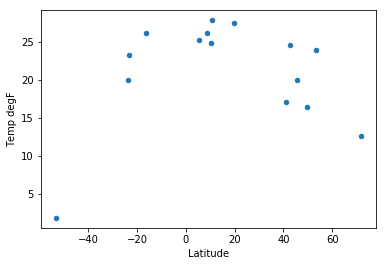

In [28]:
weather_df.plot.scatter(x='Latitude',y='Temp degF')

No handles with labels found to put in legend.


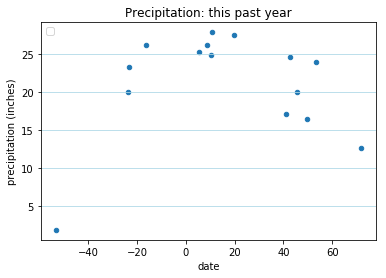

In [27]:
df.plot.scatter(x="lat_x",y="temp_y")
plt.legend(loc=2)
plt.grid(axis="y",color="lightblue")
plt.title("Precipitation: this past year")
plt.xlabel("date")
plt.ylabel("precipitation (inches)")
plt.show();